## MAT 653 
#### Wei Li

##### Example: simulate a beta distribution (R.C. example 6.1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters
a = 2.7; b = 6.3
Nsim = 500

# Initialize the chain
X = np.zeros(Nsim)
X[0] = np.random.uniform()

# Metropolis-Hastings algorithm
for i in range(1, Nsim):
    Y = np.random.uniform()
    r = beta.pdf(Y, a, b) / beta.pdf(X[i-1], a, b)
    if np.random.uniform() < r:
        X[i] = Y
    else:
        X[i] = X[i-1]

# Trace plot
plt.figure(figsize=(12, 6))
plt.plot(X, '-k')
plt.title('Trace plot')
plt.show()

# Generate samples directly from the beta distribution
Z = np.random.beta(2.6, 6.3, Nsim)

# Histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(X, bins=30, density=True, alpha=0.6, color='blue')
plt.title('Samples from MH')

plt.subplot(1, 2, 2)
plt.hist(Z, bins=30, density=True, alpha=0.6, color='green')
plt.title('Samples from numpy\'s beta')

plt.show()


##### Example: simulate a N(0,1) distribution using Metropolis (R.C. example 6.4)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Parameters
Nsim = 5000
delta = 1  # try 1, 10
X = np.full(Nsim, np.random.uniform())  # initialize the chain

# Metropolis-Hastings algorithm
for i in range(1, Nsim):
    e = np.random.uniform(-delta, delta)
    Y = X[i - 1] + e
    r = np.exp(0.5 * (X[i - 1]**2 - Y**2))
    if np.random.uniform() < r:
        X[i] = Y
    else:
        X[i] = X[i - 1]

# Trace plot
plt.figure(figsize=(12, 6))
plt.plot(X, color='black')
plt.title('Trace plot')
plt.show()

# Generate samples directly from the normal distribution
Z = np.random.normal(size=Nsim)

# Histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(X, bins=30, density=True, alpha=0.6, color='blue')
plt.title('Samples from MH')

plt.subplot(1, 2, 2)
plt.hist(Z, bins=30, density=True, alpha=0.6, color='green')
plt.title('Samples from numpy\'s normal')

plt.show()

# Autocorrelation plot
plt.figure(figsize=(12, 6))
plot_acf(X, lags=30)
plt.show()

# Thinning
X_thin = X[24::10]  # Python index starts at 0, so we start at 24 instead of 25

# Autocorrelation plot for thinned data
plt.figure(figsize=(12, 6))
plot_acf(X_thin, lags=30)
plt.show()

# Histograms for thinned data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(X_thin, bins=30, density=True, alpha=0.6, color='blue')
plt.title('Thinned samples from MH')

plt.subplot(1, 2, 2)
plt.hist(Z, bins=30, density=True, alpha=0.6, color='green')
plt.title('Samples from numpy\'s normal')

plt.show()


In the ACF plot, the shaded area represents the confidence interval for the ACF estimates, which by default is set at 95%. This means that the true autocorrelation value is expected to fall within this shaded area 95% of the time if the underlying process is white noise. In simpler terms, for any given lag in the plot:

If the ACF value lies within the shaded area, the observed autocorrelation is not statistically significant, and it could be due to random variability.
If the ACF value lies outside the shaded area (above or below), it suggests a statistically significant autocorrelation at that particular lag.


##### Example: simulate a bivariate normal using Metropolis (joint update)

In [ ]:
from scipy.stats import multivariate_normal
from numpy.linalg import inv

# Define the target density function (unnormalized)
def p_star(x, mu, Sigma):
    diff = x - mu
    return np.exp(-0.5 * diff @ inv(Sigma) @ diff.T)

# Parameters
mu = np.array([1, 2])
Sigma = np.array([[1, 1], [1, 4]])
N = 10000  # Number of draws
x_current = np.array([0, 0])  # Starting point x_0
X = np.zeros((N, 2))  # To hold sampled values
d = 2  # Half-extent of the proposal distribution

# Bivariate uniform proposal function
def rbvunif(mu, d):
    u1 = np.random.uniform(mu[0] - d, mu[0] + d)
    u2 = np.random.uniform(mu[1] - d, mu[1] + d)
    return np.array([u1, u2])

# Metropolis algorithm
for i in range(N):
    x_proposed = rbvunif(mu=x_current, d=d)  # Proposal
    r = p_star(x_proposed, mu, Sigma) / p_star(x_current, mu, Sigma)
    if r >= 1 or np.random.uniform() <= r:
        X[i] = x_proposed
        x_current = x_proposed
    else:
        X[i] = x_current

# Compare sample statistics to parameters
sample_mean = np.mean(X, axis=0)
sample_cov = np.cov(X.T)

print("Sample mean:", sample_mean)
print("Sample covariance matrix:\n", sample_cov)

# Generate samples directly from a multivariate normal distribution
Z = np.random.multivariate_normal(mu, Sigma, N)

# Plotting
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], s=1, alpha=0.5)
plt.title('Sample from Metropolis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.ylim(np.min(X[:, 1]), np.max(X[:, 1]))

plt.subplot(1, 2, 2)
plt.scatter(Z[:, 0], Z[:, 1], s=1, alpha=0.5)
plt.title('Sample from numpy')
plt.xlabel('X1')
plt.ylabel('X2')
plt.ylim(np.min(X[:, 1]), np.max(X[:, 1]))

plt.show()

# Plotting individual chains
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(X[:, 0])
plt.title('Trace plot for X1')

plt.subplot(1, 2, 2)
plt.plot(X[:, 1])
plt.title('Trace plot for X2')

plt.show()


In [ ]:

# Plot the ACF for each coordinate
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plot_acf(X[:, 0], lags=50, ax=plt.gca())
plt.title('ACF for X1')

plt.subplot(1, 2, 2)
plot_acf(X[:, 1], lags=50, ax=plt.gca())
plt.title('ACF for X2')

plt.show()

##### Example: simulate a bivariate normal using Metropolis (blockwise update)

In [5]:
Sigma = np.array([[1, 1], [1, 4]])
inv(Sigma)

array([[ 1.33333333, -0.33333333],
       [-0.33333333,  0.33333333]])

Sample mean: [0.13136661 0.06907576]
Sample covariance matrix:
 [[ 0.21777907 -0.00037096]
 [-0.00037096  0.28080034]]


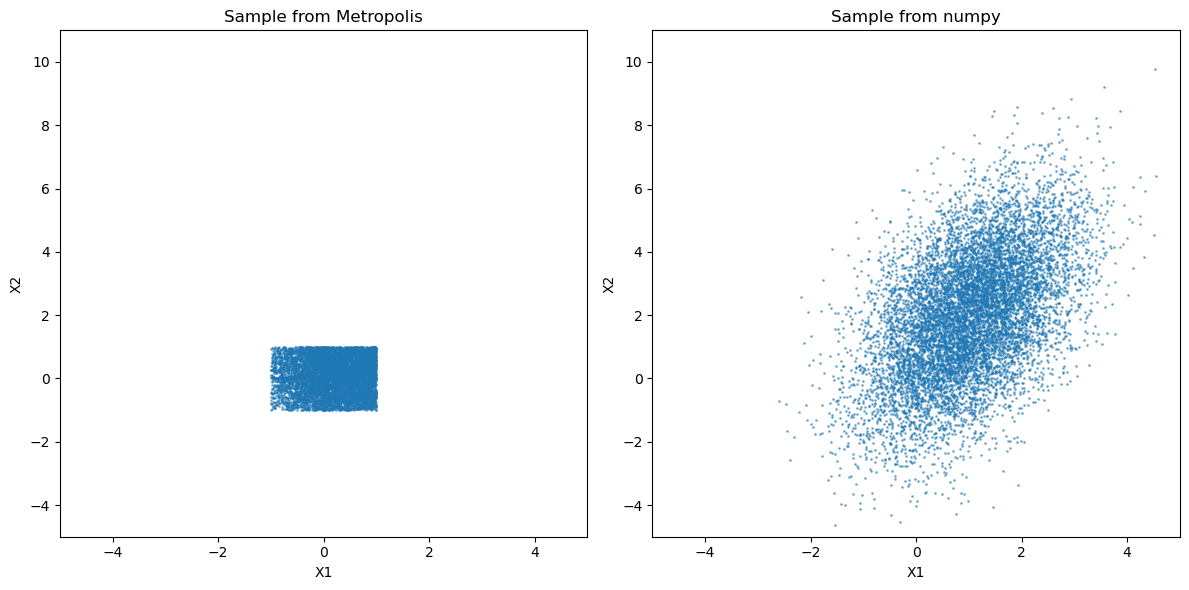

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from numpy.linalg import inv

# Define the target density function (unnormalized)
def p_star(x, mu, Sigma):
    diff = np.array(x) - mu
    return np.exp(-0.5 * diff.T @ inv(Sigma) @ diff)

# Parameters
mu = np.array([1, 2])
Sigma = np.array([[1, 1], [1, 4]])
N = 10000  # Number of draws
x_current = np.array([0, 0])  # Starting point x_0
X = np.zeros((N, 2))  # To hold sampled values
d1 = 1
d2 = 1

# Metropolis algorithm
for i in range(N):
    # Update first component x1
    x1_proposed = x_current[0] + np.random.uniform(-d1, d1)
    x_proposed = [x1_proposed, x_current[1]]
    r = p_star(x_proposed, mu, Sigma) / p_star(x_current, mu, Sigma)
    if r >= 1 or np.random.uniform() <= r:
        X[i, 0] = x1_proposed
        x_current[0] = x1_proposed
    else:
        X[i, 0] = x_current[0]
    
    # Update second component x2
    x2_proposed = x_current[1] + np.random.uniform(-d2, d2)
    x_proposed = [x_current[0], x2_proposed]
    r = p_star(x_proposed, mu, Sigma) / p_star(x_current, mu, Sigma)
    if r >= 1 or np.random.uniform() <= r:
        X[i, 1] = x2_proposed
        x_current[1] = x2_proposed
    else:
        X[i, 1] = x_current[1]

# Compare sample statistics to parameters
sample_mean = np.mean(X, axis=0)
sample_cov = np.cov(X.T)

print("Sample mean:", sample_mean)
print("Sample covariance matrix:\n", sample_cov)

# Generate samples directly from a multivariate normal distribution
Z = np.random.multivariate_normal(mu, Sigma, N)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], s=1, alpha=0.5)
plt.title('Sample from Metropolis')
plt.xlabel('X1')
plt.ylabel('X2')
#plt.ylim(np.min(X[:, 1]), np.max(X[:, 1]))
plt.xlim(-5, 5)
plt.ylim(-5, 11)


plt.subplot(1, 2, 2)
plt.scatter(Z[:, 0], Z[:, 1], s=1, alpha=0.5)
plt.title('Sample from numpy')
plt.xlabel('X1')
plt.ylabel('X2')
#plt.ylim(np.min(X[:, 1]), np.max(X[:, 1]))
plt.xlim(-5, 5)
plt.ylim(-5, 11)

plt.tight_layout()
plt.show()

In [ ]:
# Plotting trace plots for each component s
plt.figure(figsize=(12, 6))

# Trace plot for the first component
plt.subplot(1, 2, 1)
plt.plot(X[:, 0], color='blue')
plt.title('Trace Plot for X1')
plt.xlabel('Iteration')
plt.ylabel('Sampled Value')

# Trace plot for the second component
plt.subplot(1, 2, 2)
plt.plot(X[:, 1], color='red')
plt.title('Trace Plot for X2')
plt.xlabel('Iteration')
plt.ylabel('Sampled Value')

plt.tight_layout()
plt.show()

In [ ]:
burn_in = int(0.9 * N)  # 50% burn-in period

# Discard burn-in period
X_burned_in = X[burn_in:]

# Compare sample statistics to parameters after burn-in
sample_mean = np.mean(X_burned_in, axis=0)
sample_cov = np.cov(X_burned_in.T)

print("Sample mean after burn-in:", sample_mean)
print("Sample covariance matrix after burn-in:\n", sample_cov)

# Generate samples directly from a multivariate normal distribution
Z = np.random.multivariate_normal(mu, Sigma, N)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_burned_in[:, 0], X_burned_in[:, 1], s=1, alpha=0.5)
plt.title('Sample from Metropolis (after burn-in)')
plt.xlabel('X1')
plt.ylabel('X2')
#plt.ylim(np.min(X_burned_in[:, 1]), np.max(X_burned_in[:, 1]))
plt.xlim(-5, 5)
plt.ylim(-5, 11)


plt.subplot(1, 2, 2)
plt.scatter(Z[:, 0], Z[:, 1], s=1, alpha=0.5)
plt.title('Sample from numpy')
plt.xlabel('X1')
plt.ylabel('X2')
#plt.ylim(np.min(X_burned_in[:, 1]), np.max(X_burned_in[:, 1]))
plt.xlim(-5, 5)
plt.ylim(-5, 11)

plt.tight_layout()
plt.show()